# Lab 3

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Thursday, September 17th, 2020.

## - Description -

This is where the fun begins >:)

### Import libraries which will be used and extract data:

In [1]:
# Libraries we shall be using.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer # start = timer(), end = timer()

a_frame = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('a_frame(row, col) =', a_frame.shape)
a_frame.head(9) # Print the first 9 entries.

a_frame(row, col) = (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


1) Pivoting the data.  

#### a) Rank occupation by most likely to make an income over $50k yearly.

In [2]:
# Create a sub-frame of the adult data with just the columns 'occupation' and 'income'.
occ_income = a_frame[['occupation', 'income']]

# Create two sub-frames of the previous sub-frame corresponding to two groups:
# Group 1: all of those who make over $50K, grouped by occupation, and
# Group 2: all of those who make under $50K, grouped by occupation.
greater = occ_income[occ_income['income'] == '>50K'].groupby('occupation').count()
lesser =  occ_income[occ_income['income'] == '<=50K'].groupby('occupation').count()

# Find the ratio for each occupation as a:b where a is the number of
# individuals who make over $50K, and b is the total number in that
# sample occupation.
totals = []
for pair in zip(greater['income'].tolist(), lesser['income'].tolist()):
    totals.append(sum(pair))

# This is simply the list of unique occupations in the dataaframe.
occ_list = sorted(set(occ_income['occupation']))

# Just putting ratios next to their corresponding occupation
ratios = list(zip([pair[0]/pair[1] for pair in zip(greater['income'].tolist(), totals)], occ_list))

# Ignore the useless data (row of '?')
ratios.pop(0)

print("Occupations most to least likely to make over $50K annually based on sample:")
for elem in sorted(ratios, reverse=True):
    print('- ', elem[1], end='.\n')

Occupations most to least likely to make over $50K annually based on sample:
-  Exec-managerial.
-  Prof-specialty.
-  Protective-serv.
-  Tech-support.
-  Sales.
-  Craft-repair.
-  Transport-moving.
-  Adm-clerical.
-  Machine-op-inspct.
-  Farming-fishing.
-  Armed-Forces.
-  Handlers-cleaners.
-  Other-service.
-  Priv-house-serv.


### b) Calculate the median age of people who make more and less than $50k. Calculate the medians for each again, but now split apart by the sex of the adults.



In [3]:
# NOTE: Creating a sub-frame that contain: age, sex, and income.
#       Then two sub-sub-frames which are split by income class.
age_sex_income = a_frame[['age', 'sex', 'income']]
upper_income = age_sex_income[age_sex_income['income'] == '>50K']
lower_income = age_sex_income[age_sex_income['income'] == '<=50K']

# Calculate the upper & lower medians for BOTH genders.
upper_median = np.median(upper_income.loc[:,'age'].tolist())
lower_median = np.median(lower_income.loc[:,'age'].tolist())

# Calculate the upper & lower medians for MALES.
m_upper_median = np.median(upper_income[upper_income['sex'] == 'Male'].loc[:, 'age'].tolist())
m_lower_median = np.median(lower_income[lower_income['sex'] == 'Male'].loc[:, 'age'].tolist())

# Calculate the upper & lower medians for FEMALES.
f_upper_median = np.median(upper_income[upper_income['sex'] == 'Female'].loc[:, 'age'].tolist())
f_lower_median = np.median(lower_income[lower_income['sex'] == 'Female'].loc[:, 'age'].tolist())

print('      ----- Median Ages ----')
print('Income:      >50K     <=50K|')
print('Male  | ', m_upper_median, m_lower_median, sep='     ', end=' |\n')
print('Female| ', f_upper_median, f_lower_median, sep='     ', end=' |\n')
print('      ----------------------')
print('BOTH  | ', upper_median, lower_median, sep='     ', end=' |\n')
print('      ----------------------')

      ----- Median Ages ----
Income:      >50K     <=50K|
Male  |      44.0     35.0 |
Female|      41.0     34.0 |
      ----------------------
BOTH  |      44.0     34.0 |
      ----------------------


### C) Calculate the mean and median number of years of education held by adults who make more and less than $50k.

In [4]:
# NOTE: Creating a sub-frame that contain: age, edu, and income.
#       Then two sub-sub-frames which are split by income class.
age_edu_income = a_frame[['age', 'education-num', 'income']]
upper_income2 = age_edu_income[age_edu_income['income'] == '>50K']
lower_income2 = age_edu_income[age_edu_income['income'] == '<=50K']

# First we calculate the mean and median years of edu for the upper income class.
upper_median = np.median(upper_income2.loc[:, 'education-num'].tolist())
upper_mean = np.mean(upper_income2.loc[:, 'education-num'].tolist())

# Then we calculate the same statistics on years of edu for the lower income class.
lower_median = np.median(lower_income2.loc[:, 'education-num'].tolist())
lower_mean = np.mean(lower_income2.loc[:, 'education-num'].tolist())

# NOTE: biased downwards?
print('-> Upper Income Years Of Education Held.')
print('>  Mean: ', upper_mean, 'years')
print('>  Median: ', upper_median, 'years', end='\n\n')

# NOTE: biased upwards?
print('-> Lower Income Years Of Education Held.')
print('>  Mean: ', lower_mean, 'years')
print('>  Median: ', lower_median, 'years')

-> Upper Income Years Of Education Held.
>  Mean:  11.611656676444332 years
>  Median:  12.0 years

-> Lower Income Years Of Education Held.
>  Mean:  9.595064724919094 years
>  Median:  9.0 years


### D) Plot a histogram to see the distribution of years of school held by adults who make more and less than $50k.

Note that the median looks pretty accurate on the histograms as compared to the previous section.

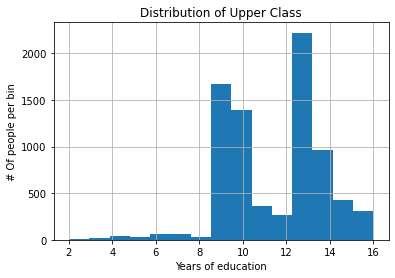

In [5]:
# NOTE: we will plot some histograms [Upper Class]!
plt.title('Distribution of Upper Class')
plt.xlabel('Years of education')
plt.ylabel('# Of people per bin')
upper_income_hist = upper_income2['education-num'].hist(bins=15)

[]

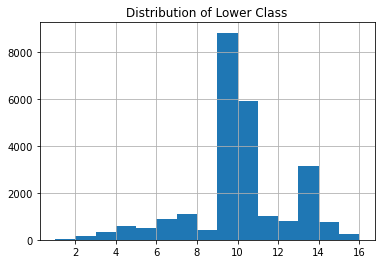

In [6]:
# NOTE: we will plot some epic histograms [Upper Class]!
plt.title('Distribution of Lower Class')
lower_income_hist = lower_income2['education-num'].hist(bins=15)
plt.plot()

### E) Plot a histogram to see the distribution of adult ages who make more and less than $50k.

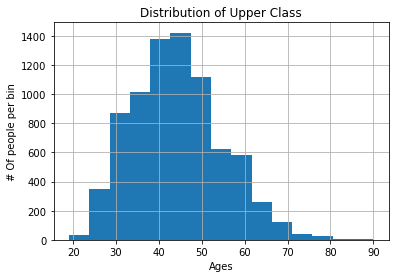

In [7]:
plt.title('Distribution of Upper Class')
plt.xlabel('Ages')
plt.ylabel('# Of people per bin')
upper_income_hist2 = upper_income2['age'].hist(bins=15)

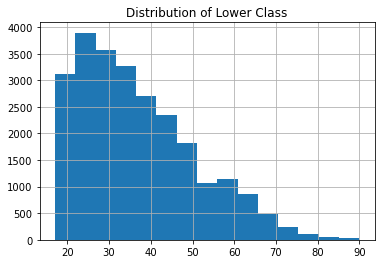

In [8]:
plt.title('Distribution of Lower Class')
lower_income_hist2 = lower_income2['age'].hist(bins=15)

## Practice Plotting

### A) Plot at least one bar plot that shows a trend within a variable that does not have inter-relationship.

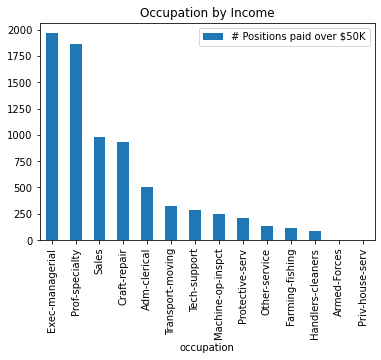

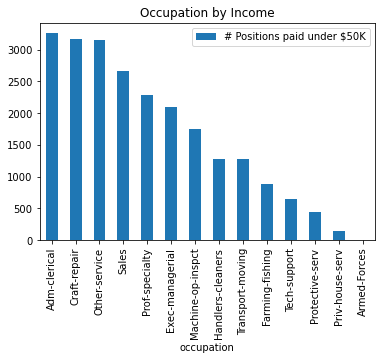

In [9]:
# This is showing which jobs tend to pay more, and pay less.
occ_data = occ_income[occ_income['occupation'] != '?']
occ_BAR = occ_data[occ_data['income'] == ">50K"].groupby('occupation').count().sort_values(by='income', ascending=False)
occ_BAR.rename(columns={'income': '# Positions paid over $50K'}, inplace=True)
occ_BAR.plot.bar(title='Occupation by Income')
occ_BAR2 = occ_data[occ_data['income'] == "<=50K"].groupby('occupation').count().sort_values(by='income', ascending=False)
occ_BAR2.rename(columns={'income': '# Positions paid under $50K'}, inplace=True)
occ_BAR2.plot.bar(title='Occupation by Income')

### B) Plot at least one line plot that shows a trend, where the x-axis variable manifests fully across the plot domain.

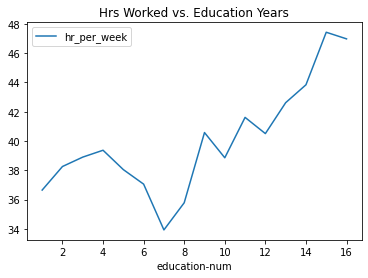

In [10]:
# This shows how hours per week on average people work by
# their years of education.
edu_vs_work = a_frame[['education-num', 'hr_per_week']]
edu_vs_work = edu_vs_work.groupby('education-num').mean()
edu_vs_work.plot.line(title='Hrs Worked vs. Education Years')

### Plot at least one scatter plot of the data that suggests a relationship between two discrete variables, where the x-axis has an inter-related progression (amount, cost, process, etc.) but is not fully/evenly observed across the plot domain.

This plot Shows a trend that the older a person is, the less they weigh in terms of population representation.

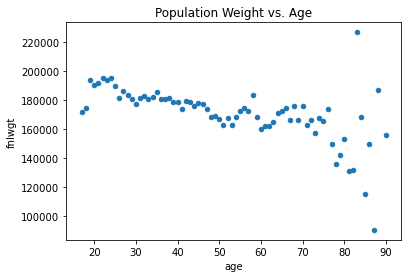

In [11]:
age_vs_wgt = a_frame[['age', 'fnlwgt']]
age_vs_wgt = age_vs_wgt.groupby('age').median().reset_index()
age_vs_wgt.plot.scatter(title='Population Weight vs. Age',x='age', y='fnlwgt')

### D)  Plot a histogram of a quantity that varies across the x-axis domain, but where we would like to consider a general distribution, rather than individual observations.

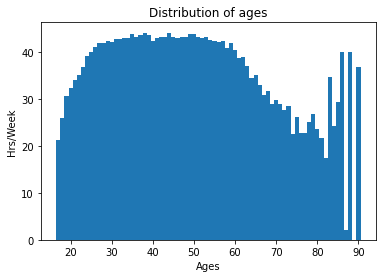

In [12]:
age_vs_work = a_frame[['age', 'hr_per_week']]
age_vs_work = age_vs_work.groupby('age').mean().reset_index()
x = age_vs_work['age']
y = age_vs_work['hr_per_week']
plt.bar(x,y, align='center', width=1)
plt.title('Distribution of ages')
plt.xlabel('Ages')
plt.ylabel('Hrs/Week')
plt.show()

## What is the relationship between between gender and whether a person makes more than $50k?

I calculated the ratios for each gender group to hopefully account for the fact that there are way more men in this sample than females.  The ratios show that men are more likely to make more than \$50K.  This is further shown in the bar graph from the next cell.  So overall, men tend to make more than \$50K in comparison to women.

Male upperclass to lowerclass ratio:   0.3057365764111978% of men are in the upperclass.
Female upperclass to lowerclass ratio: 0.10946058861758426% of females are in the upperclass.


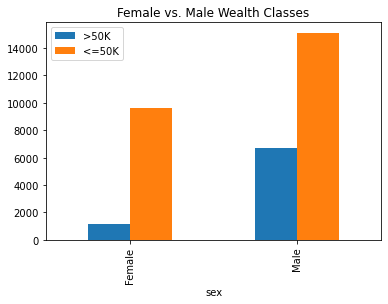

In [13]:
# Sub-frames and sub-subframes to work with.
male_vs_fem = a_frame[['sex', 'income']]
greater = male_vs_fem[male_vs_fem['income'] == '>50K'].groupby('sex').count()
lesser = male_vs_fem[male_vs_fem['income'] == '<=50K'].groupby('sex').count()

# Here we get the upperclass ratio.
total_genders = male_vs_fem['sex'].value_counts()
male_ratio = greater['income'][1]/total_genders['Male']
female_ratio = greater['income'][0]/total_genders['Female']
print(f'Male upperclass to lowerclass ratio:   {male_ratio}% of men are in the upperclass.')
print(f'Female upperclass to lowerclass ratio: {female_ratio}% of females are in the upperclass.')

# This fixes broken legend.
greater.rename(columns={'income': '>50K'}, inplace=True)
lesser.rename(columns={'income': '<=50K'}, inplace=True)

# Print the bar graph.
graph = pd.concat((greater, lesser), axis=1)
graph.plot.bar(title='Female vs. Male Wealth Classes')
plt.show()

## When a person makes more than \$50K, what is the relationship between gender and occupation? What about for less?

Based on the previous question, it is already known that men dominate both the sample population and upper class vacancy.  The graphs back up the statistics from the above graph, and show that not only do men tend to pick higher paying jobs, but women also tend to pick lower paying jobs.  This does make sense, especially since most mothers would rather have a lighter job in order to take care of the children while the husband (if applicable) typically provides the primary income.  This is not true for all men and women, but it is true for MOST based on this specific data sample.

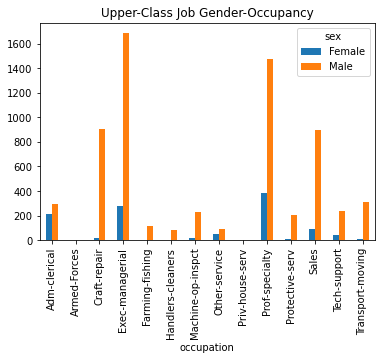

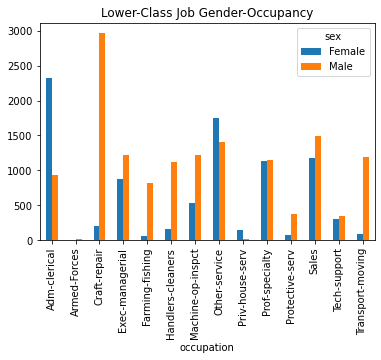

In [14]:
# This subframe will be used:
occ_gend_income = a_frame[['occupation', 'sex', 'income']]
occ_gend_income = occ_gend_income[occ_gend_income['occupation'] != '?']

# The relationship between gender and occupation for more than $50K.
greater = occ_gend_income[occ_gend_income['income'] == '>50K'].groupby(['occupation', 'sex']).count().reset_index()
greater = greater.pivot(index='occupation', columns='sex', values='income')
greater.plot.bar(title='Upper-Class Job Gender-Occupancy')

# The relationship between gender and occupation for less than $50K.
lesser = occ_gend_income[occ_gend_income['income'] == '<=50K'].groupby(['occupation', 'sex']).count().reset_index()
lesser = lesser.pivot(index='occupation', columns='sex', values='income')
lesser.plot.bar(title='Lower-Class Job Gender-Occupancy')

## What are the “richest” professions in each possible native country?

This is hard to measure due to the fact that the only information given in terms of a professions salary is binary: greater than or less than/equal to \$50K.  

In [15]:
# Make the subframe then filter data:
rich_prof = a_frame[['country', 'occupation', 'income']]
rich_prof = rich_prof[rich_prof['income'] == '>50K']
rich_prof = rich_prof[rich_prof['country'] != '?']
rich_prof = rich_prof[rich_prof['occupation'] != '?']
rich_prof = rich_prof.groupby(['country', 'occupation']).count().reset_index().groupby('country').max()

print(rich_prof)

                           occupation  income
country                                      
Cambodia                        Sales       2
Canada               Transport-moving       8
China                    Tech-support      11
Columbia                 Tech-support       1
Cuba                 Transport-moving       7
Dominican-Republic              Sales       1
Ecuador              Transport-moving       1
El-Salvador                     Sales       3
England                  Tech-support      10
France                   Tech-support       5
Germany              Transport-moving      15
Greece                 Prof-specialty       6
Guatemala                Tech-support       2
Haiti                  Prof-specialty       2
Honduras               Prof-specialty       1
Hong                  Protective-serv       3
Hungary              Transport-moving       1
India                Transport-moving      25
Iran                            Sales       8
Ireland                Prof-specia

## What is the relationship between race and level of education? Does it further seem to relate to whether a person makes more than $50k?

The mean and median years of education held by race are fairly close, and for all races they rank the same positions in both of these statistics.  It seems that asians and whites hold the longest time in school, but only by 1 year on average.  These next findings are slightly inaccurate due to the small sample size, but whites and asian/pacific islanders are most likely to be in the upper class.  This hints towards a trend but again, the sample size for most minorities on the list is very small.

In [16]:
# The fianl subframe:
final = a_frame[['race', 'education-num', 'income']]

# Finding the relationship between race and education
race_edu = final[['race', 'education-num']]
race_edu_mean = race_edu.groupby('race').mean().sort_values('education-num', ascending=False)
race_edu_median = race_edu.groupby('race').median().sort_values('education-num', ascending=False)
print('---------Mean Yrs Edu------------')
print(race_edu_mean)
print('--------Median Yrs Edu-----------')
print(race_edu_median)
print('---------------------------------', end='\n\n')

race_income = final[['race', 'income']]

# Here we will get the ratios to keep a fair balance.
race_income2 = race_income[race_income['income'] == '>50K'].groupby('race').count().sort_values(by='income')
upper = race_income2['income'].to_list()
race_income3 = race_income[race_income['income'] == '<=50K'].groupby('race').count().sort_values(by='income')
lower = race_income3['income'].to_list()

races = ['Other', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White']

total = [int(u) + int(l) for (u, l) in zip(upper, lower)]
ratios = [int(u) / int(t) for (u, t) in zip(upper, total)]

for race, ratio in zip(races, ratios):
    print(race, ', percentage of race in upper class: ', ratio, sep='')

---------Mean Yrs Edu------------
                    education-num
race                             
Asian-Pac-Islander      10.960539
White                   10.135246
Black                    9.486236
Amer-Indian-Eskimo       9.311897
Other                    8.841328
--------Median Yrs Edu-----------
                    education-num
race                             
Asian-Pac-Islander             10
White                          10
Amer-Indian-Eskimo              9
Black                           9
Other                           9
---------------------------------

Other, percentage of race in upper class: 0.09225092250922509
Amer-Indian-Eskimo, percentage of race in upper class: 0.1157556270096463
Asian-Pac-Islander, percentage of race in upper class: 0.26564003849855633
Black, percentage of race in upper class: 0.12387964148527529
White, percentage of race in upper class: 0.2558599367270636
